In [1]:
import numpy as np
import pandas as pd 
import requests

In [3]:
data1=pd.read_csv("yijiaclean012.csv")
data1.head()

,Unnamed: 0,StartTime,MatchId,ChuWin,ChuDraw,ChuLose,WinOdds,DrawOdds,LoseOdds,HomeGoals,HomeHalfGoals,AwayGoals,HomeName,HomeTeamId,AwayName,AwayTeamId,GameId,GameName,CorpId,result
0,0,/Date(1512677100000)/,2199246,1.40,4.5,7.50,1.65,4.1,5.75,1,0,2,布加勒星,577,卢加诺,1250,7,欧洲联赛,469,0
1,1,/Date(1512309600000)/,2177166,1.57,3.9,5.75,1.55,4.2,6.00,3,2,0,佛罗伦萨,360,萨索洛,3611,1,意甲,469,2
2,2,/Date(1512309600000)/,2177166,1.57,3.9,5.75,1.55,4.2,6.00,3,2,0,佛罗伦萨,360,萨索洛,3611,1,意甲,469,2
3,3,/Date(1511715600000)/,2177159,1.57,4.0,5.50,1.65,4.0,5.00,1,1,1,拉齐奥,270,佛罗伦萨,360,1,意甲,469,1
4,4,/Date(1511120700000)/,2177145,1.60,3.8,5.75,1.72,3.6,5.00,2,0,0,国米,333,亚特兰大,493,1,意甲,469,2


In [4]:
data1.shape

(3829, 20)

In [5]:
data1["allp"]=((1/data1["ChuWin"])+(1/data1["ChuLose"])+(1/data1["ChuDraw"]))

In [8]:
data1.head(1)

,Unnamed: 0,StartTime,MatchId,ChuWin,ChuDraw,ChuLose,WinOdds,DrawOdds,LoseOdds,HomeGoals,...,AwayGoals,HomeName,HomeTeamId,AwayName,AwayTeamId,GameId,GameName,CorpId,result,allp
0,0,/Date(1512677100000)/,2199246,1.4,4.5,7.5,1.65,4.1,5.75,1,...,2,布加勒星,577,卢加诺,1250,7,欧洲联赛,469,0,1.069841


In [15]:
data1.describe()

,Unnamed: 0,MatchId,ChuWin,ChuDraw,ChuLose,WinOdds,DrawOdds,LoseOdds,HomeGoals,HomeHalfGoals,AwayGoals,HomeTeamId,AwayTeamId,GameId,CorpId,result,allp
count,3829.000000,3.829000e+03,3829.000000,3829.000000,3829.000000,3829.000000,3829.000000,3829.000000,3829.000000,3829.000000,3829.000000,3829.000000,3829.000000,3829.000000,3829.0,3829.000000,3829.000000
mean,1914.000000,8.389084e+05,2.696521,3.387963,3.557046,2.774045,3.419799,3.708013,1.387569,0.604597,1.221729,436.519457,404.973884,1.001567,469.0,1.083050,1.073319
std,1105.481419,7.022897e+05,1.117181,0.469771,1.841317,1.253763,0.549132,2.080507,1.201798,0.798601,1.113322,962.815172,874.895726,0.096964,0.0,0.845356,0.014795
min,0.000000,4.410000e+03,1.300000,1.400000,1.400000,1.160000,1.300000,1.300000,0.000000,0.000000,0.000000,2.000000,2.000000,1.000000,469.0,0.000000,1.045788
25%,957.000000,3.114300e+05,1.900000,3.200000,2.250000,1.850000,3.100000,2.250000,0.000000,0.000000,0.000000,155.000000,155.000000,1.000000,469.0,0.000000,1.063492
50%,1914.000000,6.124300e+05,2.500000,3.300000,3.000000,2.500000,3.300000,3.000000,1.000000,0.000000,1.000000,270.000000,270.000000,1.000000,469.0,1.000000,1.067408
75%,2871.000000,8.691250e+05,3.200000,3.500000,4.200000,3.300000,3.600000,4.500000,2.000000,1.000000,2.000000,416.000000,416.000000,1.000000,469.0,2.000000,1.079060
max,3828.000000,2.199246e+06,6.500000,5.500000,13.000000,9.500000,7.500000,17.000000,7.000000,5.000000,7.000000,11394.000000,11394.000000,7.000000,469.0,2.000000,1.163889


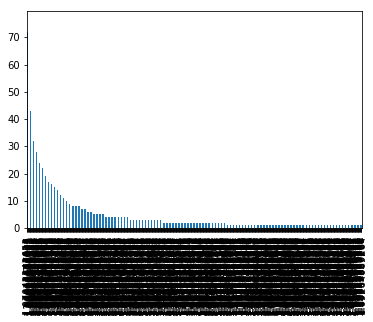

In [16]:
import matplotlib.pyplot as plt   
data1['allp'].value_counts().plot.bar()  
plt.show()  

In [ ]:
import requests

payload = {
    'corpId': 469,
    'winMin': 1.1,
    'winMax': 1.4,
    'drawMin': None,
    'drawMax': None,
    'lostMin': None,
    'lostMax': None,
    'indOddType': 0,
    'gameId': -1,
    'showcount': 500
}
response = requests.post('http://d.dacai.com/huicha/peilv.html', params=payload)

content_json = response.json()
bifen=content_json['SelectIndOddCorps']
#最全的挖取数据
import pandas as pd
def getwin(winmin,winmax):
    import requests
    payload = {
#609  betfair    365是469
        
#-1shisuoyou   -3shi五大联赛
        'corpId': 609,
        'winMin': winmin,
        'winMax': winmax,
        'drawMin': None,
        'drawMax': None,
        'lostMin': None,
        'lostMax': None,
        'indOddType': 0,
        'gameId': -1,
        'showcount': 500
     }
    response = requests.post('http://d.dacai.com/huicha/peilv.html', params=payload)

    content_json = response.json()
    bifen=content_json['SelectIndOddCorps']
    import numpy as py
    import pandas as pd
    a=pd.DataFrame.from_records([bifen[0]])#创造第一个
    for i in range(len(bifen)):
        add=pd.DataFrame.from_records([bifen[i]])
        a=[a,add]
        a=pd.concat(a)
    return(a)


first1=pd.DataFrame.from_records([bifen[0]])
for i in range(13,60,3):
    new=getwin(i/10,(i+3)/10)
    first1=[first1,new]
    first1=pd.concat(first1)
first1.shape

In [2]:
#为了获取bifen作为first1的第一个
import requests

payload = {
    'corpId': 469,
    'winMin': 1.1,
    'winMax': 1.4,
    'drawMin': None,
    'drawMax': None,
    'lostMin': None,
    'lostMax': None,
    'indOddType': 0,
    'gameId': -1,
    'showcount': 500
}
response = requests.post('http://d.dacai.com/huicha/peilv.html', params=payload)

content_json = response.json()
bifen=content_json['SelectIndOddCorps']

In [3]:

#最全的挖取数据
import pandas as pd
def getwin(winmin,winmax):
    import requests
    payload = {
#609  betfair    365是469
        
#-1shisuoyou   -3shi五大联赛
        'corpId': 609,
        'winMin': winmin,
        'winMax': winmax,
        'drawMin': None,
        'drawMax': None,
        'lostMin': None,
        'lostMax': None,
        'indOddType': 0,
        'gameId': -1,
        'showcount': 500
     }
    response = requests.post('http://d.dacai.com/huicha/peilv.html', params=payload)

    content_json = response.json()
    bifen=content_json['SelectIndOddCorps']
    import numpy as py
    import pandas as pd
    a=pd.DataFrame.from_records([{'AwayGoals': 2,
  'AwayHalfGoals': 0,
  'AwayName': '珀斯光青',
  'AwayTeamId': 7721,
  'ChuDraw': 5.0,
  'ChuLose': 5.5,
  'ChuWin': 1.36,
  'Color': 'E89F10',
  'CorpId': 469,
  'DrawOdds': 5.5,
  'GameId': 521,
  'GameName': '澳青联',
  'HomeGoals': 2,
  'HomeHalfGoals': 1,
  'HomeName': '阿德莱青',
  'HomeTeamId': 7722,
  'LoseOdds': 7.5,
  'MatchId': 2219479,
  'StartTime': '/Date(1514419200000)/',
  'WinOdds': 1.28}])#创造第一个
    for i in range(len(bifen)):
        add=pd.DataFrame.from_records([bifen[i]])
        a=[a,add]
        a=pd.concat(a)
    return(a)


In [5]:
#抓取必发所有1.9到6.0，
first1=pd.DataFrame.from_records([bifen[0]])
for i in range(13,60,1):
    new=getwin(i/10,(i+1)/10)
    first1=[first1,new]
    first1=pd.concat(first1)
first1.shape

(9576, 20)

In [7]:
first1.to_csv("bifa1.9to6.0.csv",encoding="utf_8_sig")

In [29]:
#间隔很小抓取必发的五大联赛数据。    
first1=pd.DataFrame.from_records([bifen[0]])
for i in range(1300,6000,3):
    new=getwin(i/1000,(i+3)/1000)
    first1=[first1,new]
    first1=pd.concat(first1)
first1.shape

(2462, 20)

In [30]:
first1.to_csv("5daliansaibetfair.csv",encoding="utf_8_sig")

In [19]:
first1.head()

,AwayGoals,AwayHalfGoals,AwayName,AwayTeamId,ChuDraw,ChuLose,ChuWin,Color,CorpId,DrawOdds,GameId,GameName,HomeGoals,HomeHalfGoals,HomeName,HomeTeamId,LoseOdds,MatchId,StartTime,WinOdds
0,0,0,帕尔蒂克,458,5.0,7.5,1.36,2A63A5,469,4.0,10,苏超,1,0,阿伯丁,17,6.75,2153338,/Date(1514403900000)/,1.50
0,0,0,雷恩,262,5.1,9.6,1.31,0E08A7,609,5.1,13,法甲,2,1,里昂,258,9.40,594398,/Date(1369594800000)/,1.32
0,0,0,雷恩,262,5.1,9.6,1.31,0E08A7,609,5.1,13,法甲,2,1,里昂,258,9.40,594398,/Date(1369594800000)/,1.32
0,1,0,莱万特,242,4.3,7.2,1.44,993300,609,4.4,17,西甲,0,0,毕尔巴鄂,429,7.20,602074,/Date(1369591200000)/,1.43
0,0,0,巴勒莫,465,4.3,6.6,1.48,005AC4,609,4.4,1,意甲,1,0,国米,333,6.60,612349,/Date(1354456800000)/,1.48
